6 Trace(s) in Stream:
...          | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:00.000000Z | 1.0 Hz, 0 samples
AV.DOL..BHE  | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:47.000000Z | 50.0 Hz, 15001 samples
AV.PS1A..BHE | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:46.980000Z | 50.0 Hz, 15000 samples
AV.PS4A..BHE | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:46.980000Z | 50.0 Hz, 15000 samples
AV.SSLN..BHE | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:47.000000Z | 50.0 Hz, 15001 samples
AV.WESE..BHE | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:47.000000Z | 50.0 Hz, 15001 samples
6 Trace(s) in Stream:
...          | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:00.000000Z | 1.0 Hz, 0 samples
AV.DOL..BHE  | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:47.000000Z | 1.0 Hz, 301 samples
AV.PS1A..BHE | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:46.000000Z | 1.0 Hz, 300 samples
AV.PS4A..BHE | 2021-07-29T06:15:47.000000Z - 2021-07-29T06:20:46.000000Z | 1.0 Hz, 300 sam

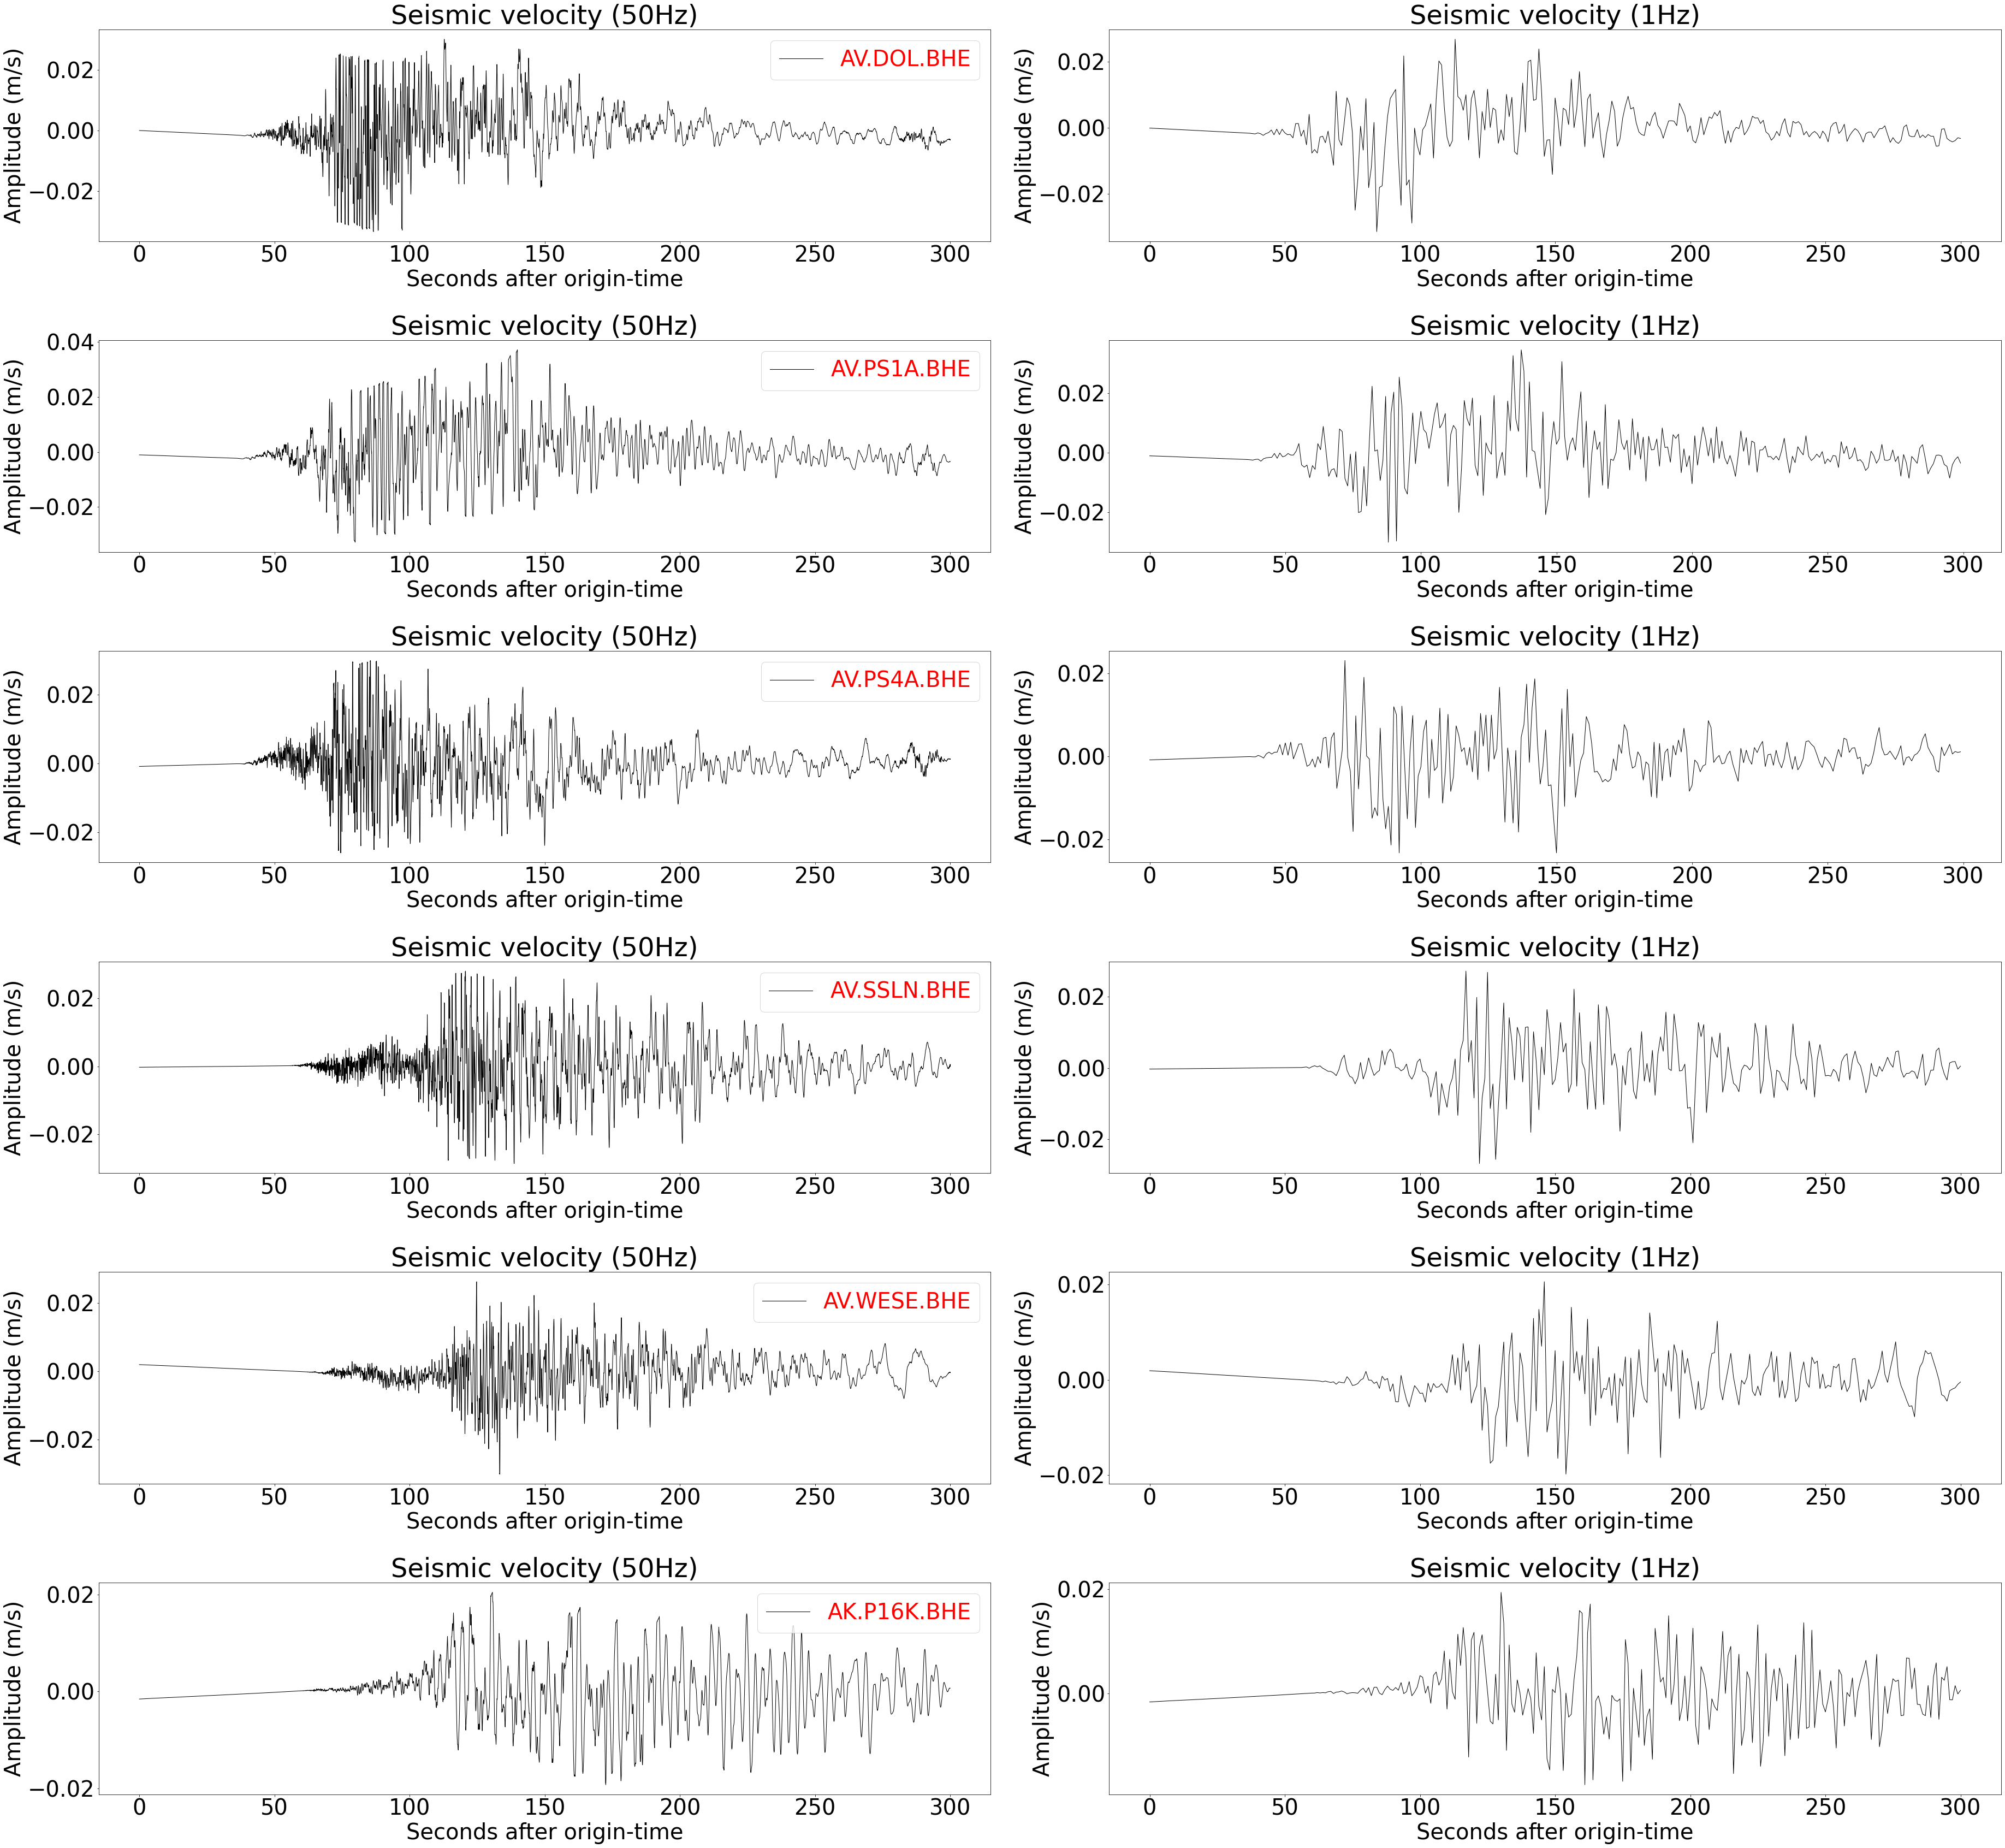

In [10]:
######## GNSS instavel Vs strong-motion derived velocity analysis and plots ##################
################################## Scipy version #############################################
####################################### Goals ################################################
#     1) Read a GNSS instavel and convert it into an obspy stream
#     2) Filter instavel
#     3) Load acceleration from IRIS client
#     4) Filter and integrate strong-motion acceleration to corresponding velocity
#     5) Subtract/find difference between GNSS and strong motion veocity
#     6) Subtract the difference from GNSS and plot trace
#     7) cross-correlate and plot both versions
##############################################################################################

from obspy import UTCDateTime 				
from obspy import Trace
from obspy import Stream
from obspy import read_inventory
from obspy.signal.cross_correlation import correlate
from obspy.clients.fdsn import Client 		
client=Client("IRIS")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# READ INSTAVEL ASCII FILE
st = Stream(Trace())
# "DOL", "P16K", "PS1A", "PS4A", "SSLN", "WESE", 
for sta in ["DOL", "PS1A", "PS4A", "SSLN", "WESE"]:
    start = UTCDateTime("2021-07-29T06:15:47.000000Z")
    seis_v = client.get_waveforms('AV', f'{sta}', "*", 'BHE', (start), (start+300), attach_response=True)
    seis_v[0].remove_response(inventory=None, output="VEL", plot=False)
    seis_v[0].detrend('linear')
    hz = seis_v[0].data[::1]
# CREATE AN EMPTY STREAM AND POPULATE WITH INSTAVEL DATA1
    st_sm = Trace()
    st_sm.stats.network = 'AV'
    st_sm.stats.station = f'{sta}'
    st_sm.stats.channel = 'BHE'       
    st_sm.stats.starttime = UTCDateTime("2021-07-29T06:15:47.0Z")
    st_sm.stats.sampling_rate = 50
    st_sm.stats.calib = 1
    st_sm.data = hz
#    st_sm.filter('bandpass', freqmin=0.001, freqmax=24.9, corners=4, zerophase=True)
    st += Stream([st_sm])

print(st)
#print(st[1])
#print(st[2])

start = UTCDateTime("2021-07-29T06:15:47.000000Z")
seis_vk = client.get_waveforms('AK', 'P16K', "*", 'BHE', (start), (start+300), attach_response=True)
seis_vk[0].remove_response(inventory=None, output="VEL", plot=False)
seis_vk[0].detrend('linear')
hzk = seis_vk[0].data[::1]
# CREATE AN EMPTY STREAM AND POPULATE WITH INSTAVEL DATA1
st_smk = Trace()
st_smk.stats.network = 'AK'
st_smk.stats.station = 'P16K'
st_smk.stats.channel = 'BHE'       
st_smk.stats.starttime = UTCDateTime("2021-07-29T06:15:47.0Z")
st_smk.stats.sampling_rate = 50
st_smk.stats.calib = 1
st_smk.data = hzk
#st_smk.filter('bandpass', freqmin=0.001, freqmax=24.9, corners=4, zerophase=True)

# READ INSTAVEL ASCII FILE
st1 = Stream(Trace())
# "DOL", "P16K", "PS1A", "PS4A", "SSLN", "WESE", 
for sta1 in ["DOL", "PS1A", "PS4A", "SSLN", "WESE"]:
    start = UTCDateTime("2021-07-29T06:15:47.000000Z")
    seis1_v = client.get_waveforms('AV', f'{sta1}', "*", 'BHE', (start), (start+300), attach_response=True)
    seis1_v[0].remove_response(inventory=None, output="VEL", plot=False)
    seis1_v[0].detrend('linear')
    hz1 = seis1_v[0].data[::50]
# CREATE AN EMPTY STREAM AND POPULATE WITH INSTAVEL DATA1
    st1_sm = Trace()
    st1_sm.stats.network = 'AV'
    st1_sm.stats.station = f'{sta1}'
    st1_sm.stats.channel = 'BHE'       
    st1_sm.stats.starttime = UTCDateTime("2021-07-29T06:15:47.0Z")
    st1_sm.stats.sampling_rate = 1
    st1_sm.stats.calib = 1
    st1_sm.data = hz1
#    st1_sm.filter('bandpass', freqmin=0.001, freqmax=0.499, corners=4, zerophase=True)
    st1 += Stream([st1_sm])

print(st1)
#print(st[1])
#print(st[2])

start = UTCDateTime("2021-07-29T06:15:47.000000Z")
seis1_vk = client.get_waveforms('AK', 'P16K', "*", 'BHE', (start), (start+300), attach_response=True)
seis1_vk[0].remove_response(inventory=None, output="VEL", plot=False)
seis1_vk[0].detrend('linear')
hzk1 = seis1_vk[0].data[::50]
# CREATE AN EMPTY STREAM AND POPULATE WITH INSTAVEL DATA1
st1_smk = Trace()
st1_smk.stats.network = 'AK'
st1_smk.stats.station = 'P16K'
st1_smk.stats.channel = 'BHE'       
st1_smk.stats.starttime = UTCDateTime("2021-07-29T06:15:47.0Z")
st1_smk.stats.sampling_rate = 1
st1_smk.stats.calib = 1
st1_smk.data = hzk1
#st1_smk.filter('bandpass', freqmin=0.001, freqmax=0.499, corners=4, zerophase=True)

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,48]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(6,2)
ax[0,0].plot(st[1].times(), st[1].data, 'k-', linewidth=1, 
             label=(st[1].stats['network'])+'.'+(st[1].stats['station'])+'.'+(st[1].stats['channel']))
ax[0,0].set_title(f'Seismic velocity (50Hz)')
ax[0,0].set_ylabel('Amplitude (m/s)')
ax[0,0].set_xlabel('Seconds after origin-time', fontsize=40)
ax[1,0].plot(st[2].times(), st[2].data, 'k-', linewidth=1, 
             label=(st[2].stats['network'])+'.'+(st[2].stats['station'])+'.'+(st[2].stats['channel']))
ax[1,0].set_title(f'Seismic velocity (50Hz)')
ax[1,0].set_ylabel('Amplitude (m/s)')
ax[1,0].set_xlabel('Seconds after origin-time')
ax[2,0].plot(st[3].times(), st[3].data, 'k-', linewidth=1, 
             label=(st[3].stats['network'])+'.'+(st[3].stats['station'])+'.'+(st[3].stats['channel']))
ax[2,0].set_title(f'Seismic velocity (50Hz)')
ax[2,0].set_ylabel('Amplitude (m/s)')
ax[2,0].set_xlabel('Seconds after origin-time')
ax[3,0].plot(st[4].times(), st[4].data, 'k-', linewidth=1, 
             label=(st[4].stats['network'])+'.'+(st[4].stats['station'])+'.'+(st[4].stats['channel']))
ax[3,0].set_title(f'Seismic velocity (50Hz)')
ax[3,0].set_ylabel('Amplitude (m/s)')
ax[3,0].set_xlabel('Seconds after origin-time')
ax[4,0].plot(st[5].times(), st[5].data, 'k-', linewidth=1, 
             label=(st[5].stats['network'])+'.'+(st[5].stats['station'])+'.'+(st[5].stats['channel']))
ax[4,0].set_title(f'Seismic velocity (50Hz)')
ax[4,0].set_ylabel('Amplitude (m/s)')
ax[4,0].set_xlabel('Seconds after origin-time')
ax[5,0].plot(st_smk.times(), st_smk.data, 'k-', linewidth=1, 
             label=(st_smk.stats['network'])+'.'+(st_smk.stats['station'])+'.'+(st_smk.stats['channel']))
ax[5,0].set_title(f'Seismic velocity (50Hz)')
ax[5,0].set_ylabel('Amplitude (m/s)')
ax[5,0].set_xlabel('Seconds after origin-time')
#ax[6,0].plot(st[7].times(), st[7].data, 'k-', linewidth=1, 
#             label=(st[7].stats['network'])+'.'+(st[7].stats['station'])+'.'+(st[7].stats['channel']))
#ax[6,0].set_title(f'Instantaneous GNSS velocity (1Hz)')
#ax[6,0].set_ylabel('Normalized amplitude')
#ax[6,0].set_xlabel('Seconds after origin-time')

ax[0,1].plot(st1[1].times(), st1[1].data, 'k-', linewidth=1, 
             label=(st1[1].stats['network'])+'.'+(st1[1].stats['station'])+'.'+(st1[1].stats['channel']))
ax[0,1].set_title(f'Seismic velocity (1Hz)')
ax[0,1].set_ylabel('Amplitude (m/s)')
ax[0,1].set_xlabel('Seconds after origin-time', fontsize=40)
ax[1,1].plot(st1[2].times(), st1[2].data, 'k-', linewidth=1, 
             label=(st1[2].stats['network'])+'.'+(st1[2].stats['station'])+'.'+(st1[2].stats['channel']))
ax[1,1].set_title(f'Seismic velocity (1Hz)')
ax[1,1].set_ylabel('Amplitude (m/s)')
ax[1,1].set_xlabel('Seconds after origin-time')
ax[2,1].plot(st1[3].times(), st1[3].data, 'k-', linewidth=1, 
             label=(st1[3].stats['network'])+'.'+(st1[3].stats['station'])+'.'+(st1[3].stats['channel']))
ax[2,1].set_title(f'Seismic velocity (1Hz)')
ax[2,1].set_ylabel('Amplitude (m/s)')
ax[2,1].set_xlabel('Seconds after origin-time')
ax[3,1].plot(st1[4].times(), st1[4].data, 'k-', linewidth=1, 
             label=(st1[4].stats['network'])+'.'+(st1[4].stats['station'])+'.'+(st1[4].stats['channel']))
ax[3,1].set_title(f'Seismic velocity (1Hz)')
ax[3,1].set_ylabel('Amplitude (m/s)')
ax[3,1].set_xlabel('Seconds after origin-time')
ax[4,1].plot(st1[5].times(), st1[5].data, 'k-', linewidth=1, 
             label=(st1[5].stats['network'])+'.'+(st1[5].stats['station'])+'.'+(st1[5].stats['channel']))
ax[4,1].set_title(f'Seismic velocity (1Hz)')
ax[4,1].set_ylabel('Amplitude (m/s)')
ax[4,1].set_xlabel('Seconds after origin-time')
ax[5,1].plot(st1_smk.times(), st1_smk.data, 'k-', linewidth=1, 
             label=(st1_smk.stats['network'])+'.'+(st1_smk.stats['station'])+'.'+(st1_smk.stats['channel']))
ax[5,1].set_title(f'Seismic velocity (1Hz)')
ax[5,1].set_ylabel('Amplitude (m/s)')
ax[5,1].set_xlabel('Seconds after origin-time')

plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
#for row in ax[:,1]:
#    ll = row.legend(loc=1)
#    plt.setp(ll.get_texts(), color='red') #color legend

#ll = ax[1,1].legend(loc=1)
#plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("SM_freq_filt_abs.png")
